# Exercise 5. Dynamic programming
#### Algorithms ans Data Structures 

by Jędrzej Kopiszka, 145304
10.06.2020r.

## 1. Knapsack problem

#### 1.1 Necessary libraries

In [163]:
import math
import random  # randomized elements - both weights and values
import pandas as pd  # DataFreame for output representation
import seaborn as sns  # plotting
import matplotlib.pyplot as plt  # plotting
from timeit import Timer  # time measuring

### 1.2 Implementation of algorithms

#### 1.2.1 Brute Force

In [164]:
def brute_force_algorithm(tab, max_weight):
    result = 0
    for element in range(1 << len(tab)):
        tmp_result=0
        tmp_weight=0
        for j in range(len(tab)):
            if element & (1 << j):
                tmp_result+=tab[j][1]
                tmp_weight+=tab[j][0]
        if tmp_weight<=max_weight and tmp_result>result:
            result=tmp_result
    return result

#### 1.2.2 Greedy algorithm - approximation of the best result

In [165]:
def greedy_algorithm(tab, max_weight):
    result = 0
    tab = sorted(tab, key=lambda x: x[1]/x[0], reverse=True)
    for element in tab:
        if element[0]>max_weight:
            continue
        if max_weight==0:
            break
        else:
            result+=element[1]
            max_weight-=element[0]
    return result

#### 1.2.3 Dynamic algorithm

In [166]:
def dynamic_algorithm(tab, max_weight):
    result=0
    help_tab = [[0 for i in range(max_weight+1)] for j in range(len(tab))]
    
    for i in range(len(tab)):
        for j in range(max_weight+1):
            if tab[i][0]>j:
                help_tab[i][j] = help_tab[i-1][j]
                continue
            a=help_tab[i-1][j]
            b=tab[i][1]+help_tab[i-1][j-tab[i][0]]
            help_tab[i][j] = max(a,b)
            if max(a,b)>result:
                result=max(a,b)
    return result

#### 1.3 Easy-to-understand samples for early-phase testing 

In [167]:
sample1=[[8,6],[2,5],[2,5],[3,2],[2,1]]
sample2=[[1,1],[3,4],[4,5],[5,7]]
sample3=[[5,3],[3,2],[1,6],[5,2],[2,17],[14,32]]

## 2. Time complexity of provided algorithms
#### Comparison of time complexity of 3 previously defined algorithms. t.timeit is used for more precise results

#### 2.1 Time for samples with different number of elements in each iteration

In [168]:
time_dict={}
print("Done for: ")
for i in range(5, 26, 2):
    randoms = []
    sum_of_weight = 0
    for element in range(i):
        weight = random.randint(1,1000)
        sum_of_weight+=weight
        randoms.append([weight, random.randint(0,9)])
        
    #brute foce time measuring
    t = Timer(lambda: brute_force_algorithm(randoms, int(0.75*sum_of_weight)))
    time_dict[i] = [t.timeit(number = 3)/3]
    
    #greedy algorith time measuring
    t = Timer(lambda: greedy_algorithm(randoms, int(0.75*sum_of_weight)))
    time_dict[i].append(t.timeit(number = 10)/10)
    
    #dynamic algorithm time measuring
    t = Timer(lambda: dynamic_algorithm(randoms, int(0.75*sum_of_weight)))
    time_dict[i].append(t.timeit(number = 10)/10)
    print(i, end=' ')
    
    
time_df = pd.DataFrame.from_dict(orient='index', data=time_dict, columns=['Brute Force', 'Greedy approach', 'Dynamic algorithm'])
time_df

Done for: 
5 7 9 11 13 15 17 19 21 23 25 

,Brute Force,Greedy approach,Dynamic algorithm
5,0.000078,0.000003,0.006206
7,0.000162,0.000003,0.012991
9,0.001445,0.000003,0.014196
11,0.004626,0.000004,0.031551
13,0.018436,0.000004,0.049145
15,0.090557,0.000005,0.061045
17,0.401075,0.000005,0.089678
19,1.660974,0.000010,0.083609
21,10.027840,0.000009,0.201553
23,36.880963,0.000007,0.128817


#### 2.2 Time complexity results shown on plot

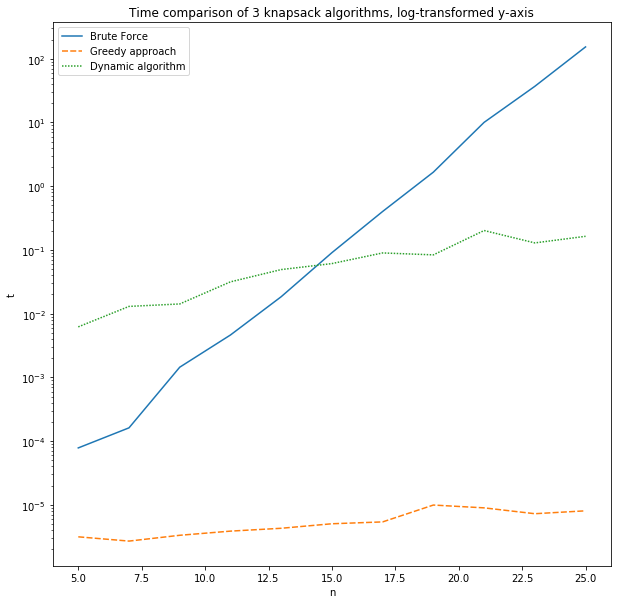

In [169]:
plt.figure(figsize=(10,10))
sns.lineplot(data=time_df)
plt.xlabel('n')
plt.ylabel('t')
plt.yscale('log')
plt.title('Time comparison of 3 knapsack algorithms, log-transformed y-axis')
plt.show()

## 3. Comparison of greedy and dynamic algorithm 
#### Greedy algorithm not always produces the right result, it is an approximation of the right result which is always provided by dynamic algorithm and brute force

In [170]:
count_same_output=0
compare_dict={}
print("Computed for: ")
for i in range(10, 151, 5):
    randoms = []
    sum_of_weight = 0
    for element in range(i):
        weight = random.randint(1,1000)
        sum_of_weight+=weight
        randoms.append([weight, random.randint(0,9)])
        
    return_greedy = greedy_algorithm(randoms, int(0.75*sum_of_weight))
    return_dynamic = dynamic_algorithm(randoms, int(0.75*sum_of_weight))
    
    compare_dict[int(0.75*sum_of_weight)] = [return_greedy, return_dynamic, abs(return_greedy-return_dynamic)]
    if return_greedy == return_dynamic:
        count_same_output+=1
        compare_dict[int(0.75*sum_of_weight)].append("yes")
    else:
        compare_dict[int(0.75*sum_of_weight)].append("no")
    print(i, end=' ')
        
print("\nNumber of examples where approximation executed the same result as optimal - dynamic solution: ", count_same_output)

Computed for: 
10 15 20 25 30 35 40 45 50 55 60 65 70 75 80 85 90 95 100 105 110 115 120 125 130 135 140 145 150 
Number of examples where approximation executed the same result as optimal - dynamic solution:  28


In [171]:
compare_df = pd.DataFrame.from_dict(orient='index', data=compare_dict, columns=['Greedy', 'Dynamic','Error', 'The same value'])
compare_df

,Greedy,Dynamic,Error,The same value
3983,43,43,0,yes
6267,75,75,0,yes
6857,100,100,0,yes
10650,123,123,0,yes
10689,122,122,0,yes
13632,157,158,1,no
15384,164,164,0,yes
15701,230,230,0,yes
18665,213,213,0,yes
22189,257,257,0,yes


## 4. Conclusions on the effectiveness of the methods

Discussed below is an NP-Complete 0/1 Knapsack problem. 
We should start the comparison of the provided algorithms by briefly discussing the Brute Force algorithm. 

Brute Force is the most straight-forward solution, based on finding the powerset. Having the powerset allows us to compute every possible value and check if it meets the criteria. It relies on the very simple strategy, however, the time complexity of that approach is intolerable  - O(2^n). An exponential increase in time makes it practically useless (unless we have very small n i.e. less than ~15).

The greedy algorithm grants us simple and fast solutions, though defective. It relies on calculating proportion: value/weight. We want to select the elements with the highest possible value/weight rate. Despite the simplicity and at first glance functioning solution, it does not always produce the highest value - the right solution. Its time complexity relies deeply on sorting algorithm used - because of this its time can fluctuate from O(n*logn) to O(n^2)

The best strategy is to use dynamic programming. The dynamic solution is based on creating a two-dimensional array with values calculated by a recursive definition. The time complexity of this method is O(n*max_weight).